In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
ldir = os.chdir(r'C:\Users\Gergely\Documents\Datasets')
df = pd.read_csv('Head_Size.csv')

In [3]:
df.columns=['Gender', 'Age_Range', 'Head_Size', 'Brain_Weight']
df.head()

,Gender,Age_Range,Head_Size,Brain_Weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
df.Gender = df.Gender.map(lambda x : x-1)
df.head()

,Gender,Age_Range,Head_Size,Brain_Weight
0,0,1,4512,1530
1,0,1,3738,1297
2,0,1,4261,1335
3,0,1,3777,1282
4,0,1,4177,1590


In [5]:
df.corr()

,Gender,Age_Range,Head_Size,Brain_Weight
Gender,1.000000,-0.088652,-0.514050,-0.465266
Age_Range,-0.088652,1.000000,-0.105428,-0.169438
Head_Size,-0.514050,-0.105428,1.000000,0.799570
Brain_Weight,-0.465266,-0.169438,0.799570,1.000000


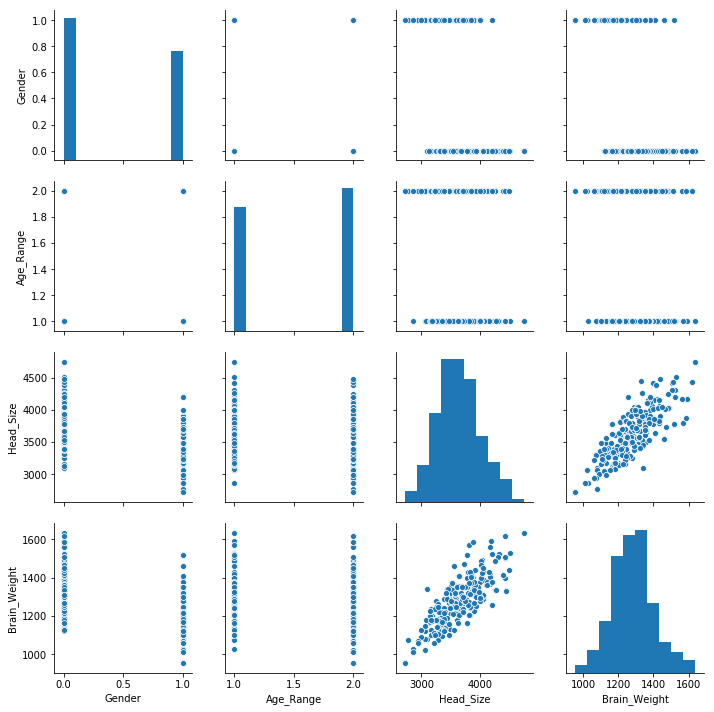

In [6]:
import seaborn as sns

sns.pairplot(df)

In [7]:
from sklearn.model_selection import train_test_split

X = df.loc[:, ['Gender', 'Head_Size']]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
feature_names = list(X.columns)
feature_names

['Gender', 'Head_Size']

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
gb.score(X_test, y_test)

0.4793668120654128

In [29]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=0, max_depth=3, min_samples_split=8).fit(X_train, y_train)
tree_model.score(X_test, y_test)

0.6383920802258062

In [11]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=2, random_state=0).fit(X_train, y_train)
forest.score(X_test, y_test)

0.610602096958697

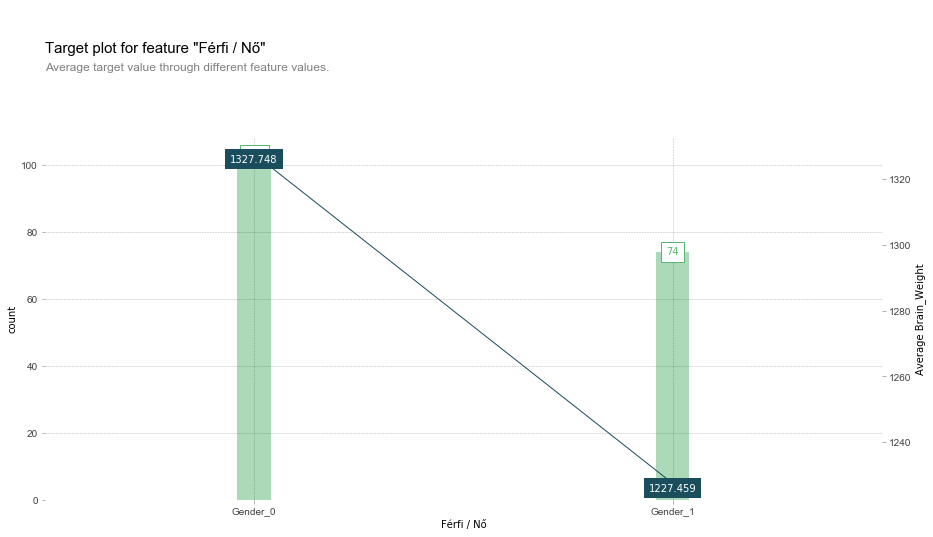

In [12]:
from pdpbox import pdp, info_plots

train_df, test_df = train_test_split(df, test_size=0.25, random_state=0)

fig, axes, summary_df = info_plots.target_plot(
df=train_df, feature='Gender', feature_name='Férfi / Nő', target='Brain_Weight', show_percentile=True, endpoint=False)

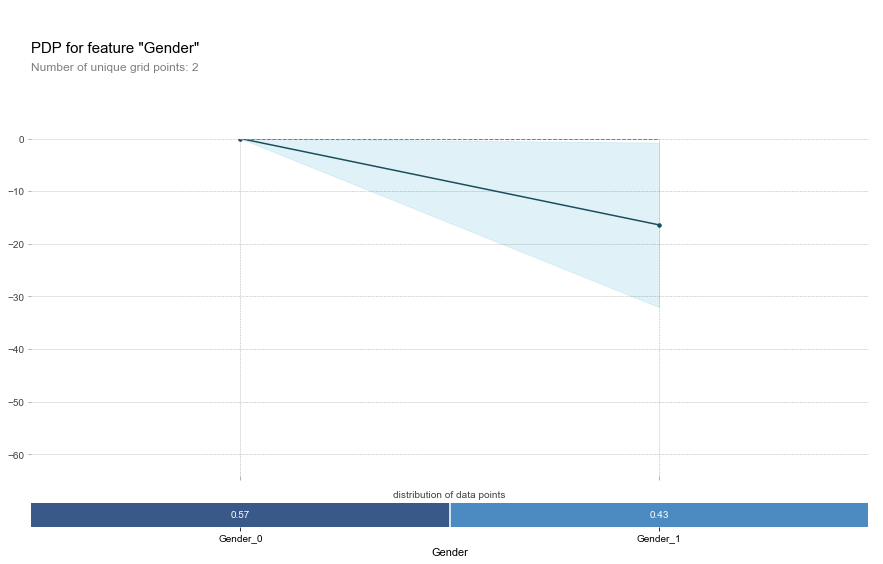

In [13]:
pdp_fare = pdp.pdp_isolate(model=gb, dataset=X_train, model_features=X_train.columns, feature='Gender')

fig, axes = pdp.pdp_plot(pdp_fare, 'Gender', plot_pts_dist=True)

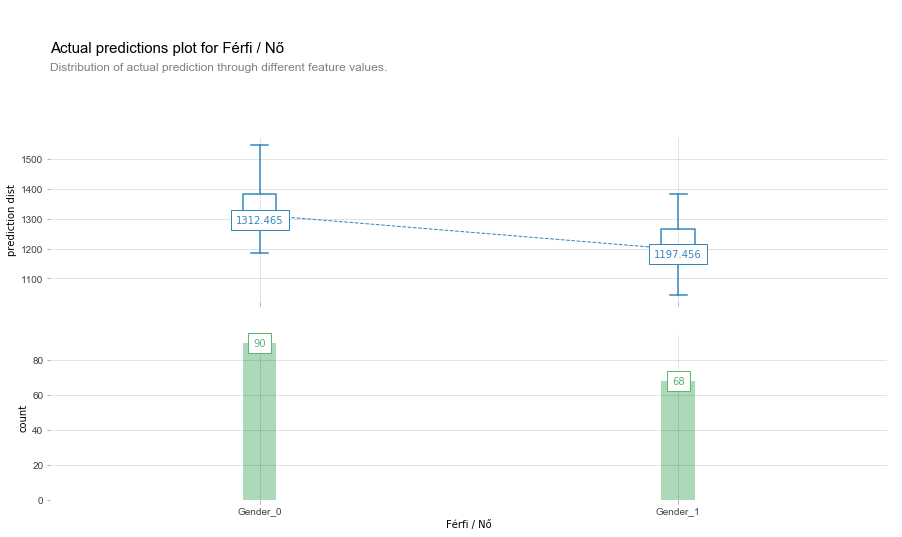

In [14]:
fig, axes, summary_df = info_plots.actual_plot(
model=gb, X=X_train, feature='Gender', feature_name='Férfi / Nő', predict_kwds={}, endpoint=False)

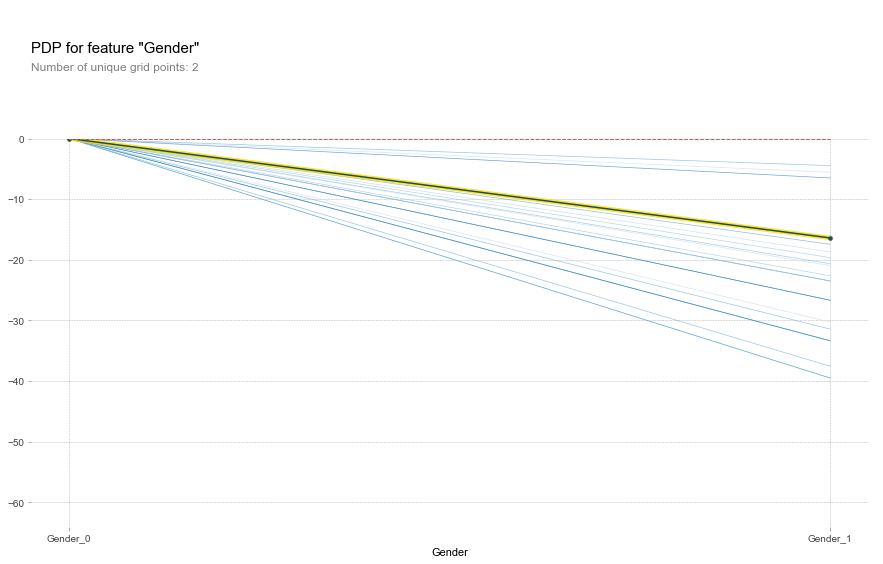

In [15]:
pdp_limit = pdp.pdp_isolate(model=gb, dataset=X_train, model_features=X_train.columns, feature='Gender')

fig, axes = pdp.pdp_plot(
pdp_limit, 'Gender', frac_to_plot=0.2, plot_lines=True, x_quantile=True, show_percentile=True)

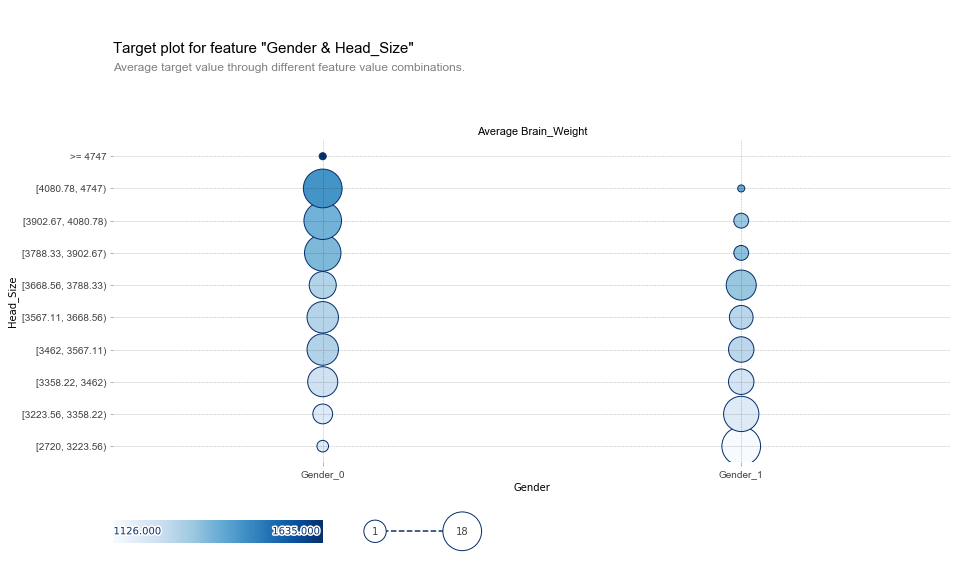

In [16]:
fig, axes, summary_df = info_plots.target_plot_interact(
df=train_df, features=['Gender', 'Head_Size'], feature_names=['Gender', 'Head_Size'], target='Brain_Weight', endpoint=False)

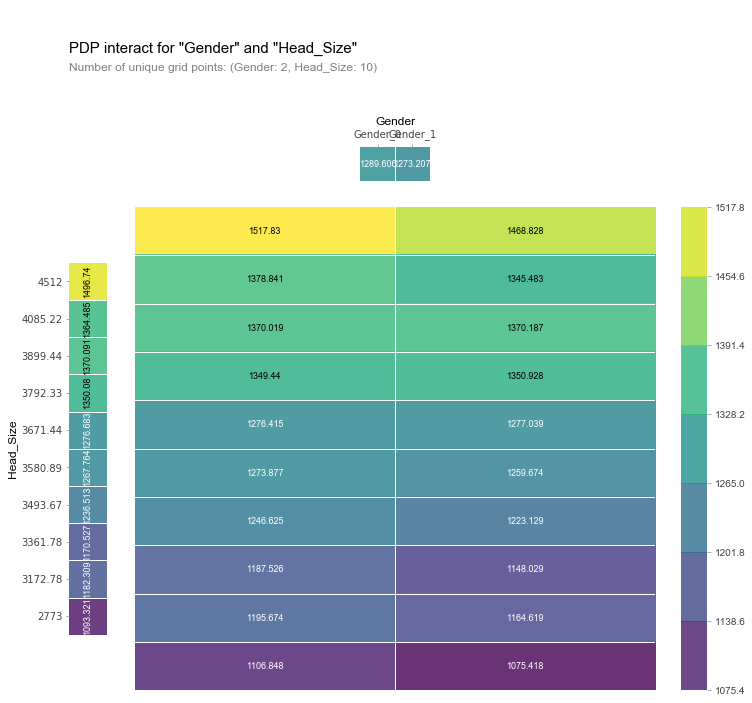

In [17]:
inter1 = pdp.pdp_interact(model=gb, dataset=X_train, model_features=X_train.columns, features=['Gender', 'Head_Size'])
 
fig, axes = pdp.pdp_interact_plot(
pdp_interact_out = inter1, feature_names=['Gender', 'Head_Size'], plot_type='grid', x_quantile=True, plot_pdp=True)

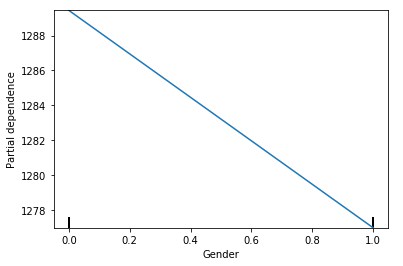

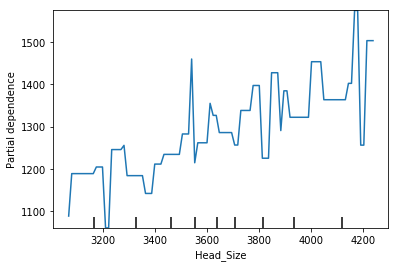

In [18]:
from sklearn.inspection import plot_partial_dependence

plot_partial_dependence(tree_model, X_train, features=['Gender'])
plot_partial_dependence(tree_model, X_train, features=['Head_Size'])

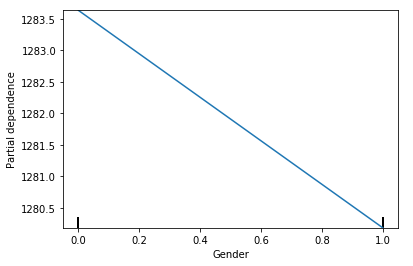

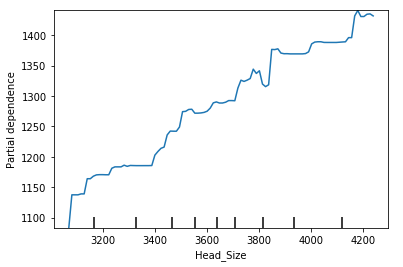

In [19]:
plot_partial_dependence(forest, X_train, features=['Gender'])
plot_partial_dependence(forest, X_train, features=['Head_Size'])

In [20]:
from pycebox.ice import ice, ice_plot

ice_df = ice(X_train, 'Head_Size', gb.predict)
ice_df.head()

data_Head_Size,2773,2857,2937,2939,2989,3000,3058,3069,3071,3082,...,4200,4208,4253,4261,4270,4308,4315,4442,4488,4512
Gender,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Head_Size,,,,,,,,,,,,,,,,,,,,,
2773,1075.417990,1075.417990,1075.417990,1075.417990,1075.417990,1075.417990,1075.417990,1075.417990,1075.417990,1075.417990,...,1106.847729,1106.847729,1106.847729,1106.847729,1106.847729,1106.847729,1106.847729,1106.847729,1106.847729,1106.847729
2857,1045.575215,1045.575215,1045.575215,1045.575215,1045.575215,1045.575215,1045.575215,1045.575215,1045.575215,1045.575215,...,1077.004955,1077.004955,1077.004955,1077.004955,1077.004955,1077.004955,1077.004955,1077.004955,1077.004955,1077.004955
2937,1068.867063,1068.867063,1068.867063,1068.867063,1068.867063,1068.867063,1068.867063,1068.867063,1068.867063,1068.867063,...,1100.296803,1100.296803,1100.296803,1100.296803,1100.296803,1100.296803,1100.296803,1100.296803,1100.296803,1100.296803
2939,1068.867063,1068.867063,1068.867063,1068.867063,1068.867063,1068.867063,1068.867063,1068.867063,1068.867063,1068.867063,...,1100.296803,1100.296803,1100.296803,1100.296803,1100.296803,1100.296803,1100.296803,1100.296803,1100.296803,1100.296803
2989,1102.719107,1102.719107,1102.719107,1102.719107,1102.719107,1102.719107,1102.719107,1102.719107,1102.719107,1102.719107,...,1132.996232,1132.996232,1132.996232,1132.996232,1132.996232,1132.996232,1132.996232,1132.996232,1132.996232,1132.996232


Text(0.5, 1.0, 'ICE curves')

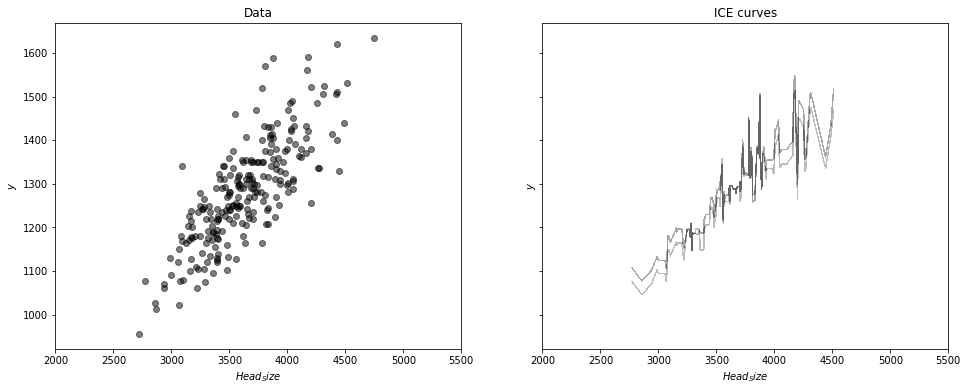

In [21]:
fig, (data_ax, ice_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 6))

data_ax.scatter(df.Head_Size, y, c='k', alpha=0.5)

data_ax.set_xlim(2000, 5500)
data_ax.set_xlabel('$Head_Size$')
data_ax.set_ylabel('$y$')
data_ax.set_title('Data')

ice_plot(ice_df, c='k', alpha=0.005, ax=ice_ax, plot_points=False)

ice_ax.set_xlabel('$Head_Size$')
ice_ax.set_ylabel('$y$')
ice_ax.set_title('ICE curves')